#Classification Task

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the dataset into a DataFrame object using the Pandas library [8]
churn_data = pd.read_csv("/content/drive/MyDrive/Final Assessment AI/Bank Customer Churn Prediction.csv")
print("Top 5 datas:\n")
display(churn_data.head(5))

Top 5 datas:



,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Data Cleaning
churn_data.dropna(inplace=True)
print("Null datas:\n")
display(churn_data.isnull().sum())

Null datas:



,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
# Datatypes of table
print("Data types:\n")
display(churn_data.dtypes)

Data types:



,0
customer_id,int64
credit_score,int64
country,object
gender,object
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64


In [ ]:
#Drop duplicate datas
churn_data.drop_duplicates(inplace=True)
print("Duplicate datas:\n")
display(churn_data.duplicated().sum())

Duplicate datas:



0

In [ ]:
# Select Features and Target
features = churn_data[['age', 'balance', 'credit_score', 'estimated_salary']]
target = churn_data['churn']

In [ ]:
# Scale Features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Split Data into Train/Test Sets [8]
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

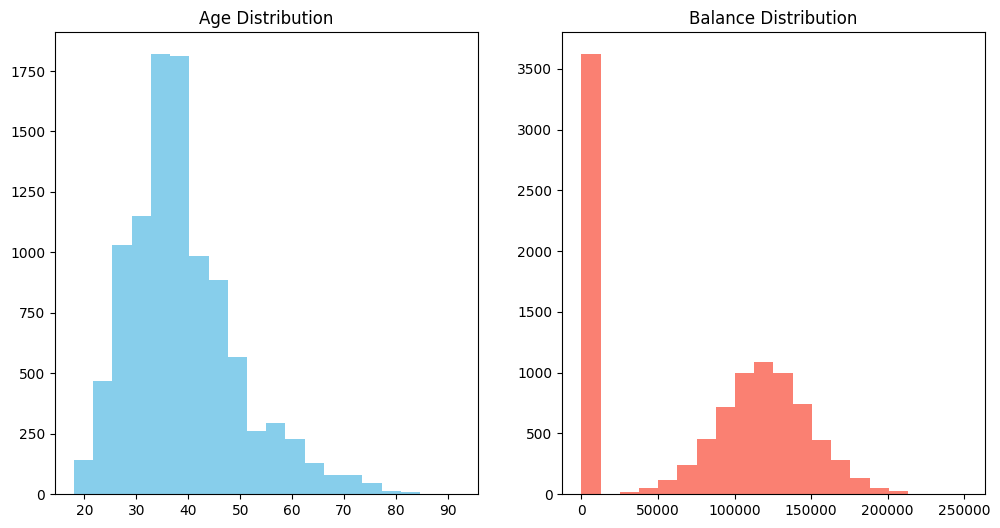

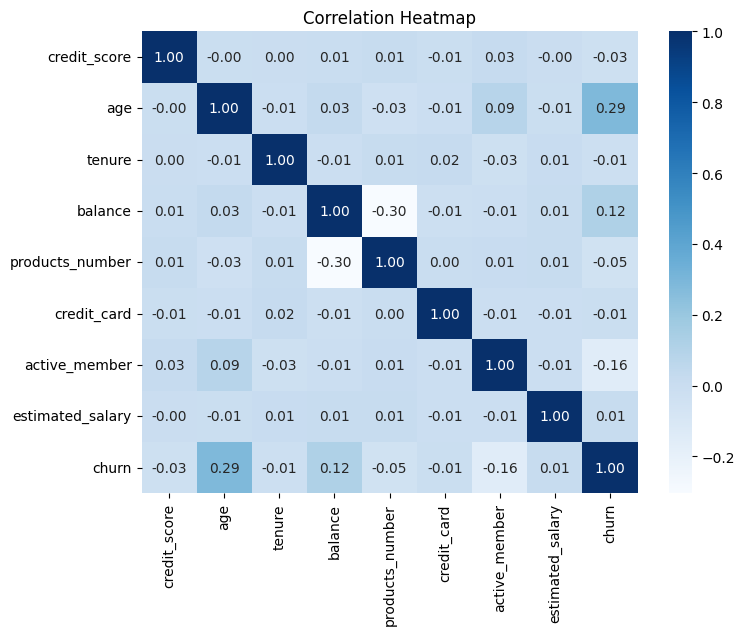

In [ ]:
# Visualize Feature Distributions for EDA [8]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(churn_data['age'], bins=20, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
plt.hist(churn_data['balance'], bins=20, color='salmon')
plt.title('Balance Distribution')
plt.show()

# Select numeric columns for correlation
numeric_cols = churn_data.select_dtypes(include=["number"]).drop(columns=["customer_id"])
correlation_matrix = numeric_cols.corr()

# Plot correlation heatmap [8]
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Build Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

In [ ]:
# Train the Scratch Model
scratch_model = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
scratch_model.fit(X_train, y_train)
y_pred_scratch = scratch_model.predict(X_test)
print("Scratch Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_scratch))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_scratch))
print("Classification Report:\n", classification_report(y_test, y_pred_scratch))

Scratch Model Performance:
Accuracy: 0.788
Confusion Matrix:
 [[1555   52]
 [ 372   21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      1607
           1       0.29      0.05      0.09       393

    accuracy                           0.79      2000
   macro avg       0.55      0.51      0.49      2000
weighted avg       0.70      0.79      0.72      2000



In [ ]:
# Build Models Using Scikit-Learn
# Model 1
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

# evaluating model
pred_1 = model_1.predict(X_test)
print("Model 1 (Logistic Regression without Regularization) Performance:")
print("Accuracy:", accuracy_score(y_test, pred_1))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_1))

Model 1 (Logistic Regression without Regularization) Performance:
Accuracy: 0.789
Confusion Matrix:
 [[1552   55]
 [ 367   26]]


In [ ]:
# Model 2
model_2 = LogisticRegression(penalty='l2', solver='liblinear')
model_2.fit(X_train, y_train)

# Evaluate Models
pred_2 = model_2.predict(X_test)
print("Model 2 (Logistic Regression with L2 Regularization) Performance:")
print("Accuracy:", accuracy_score(y_test, pred_2))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_2))

Model 2 (Logistic Regression with L2 Regularization) Performance:
Accuracy: 0.789
Confusion Matrix:
 [[1552   55]
 [ 367   26]]


In [ ]:
# Hyperparameter Tuning Using Cross Validation
param_grid = {'C': [0.01, 0.1, 1, 10]}
logreg_cv = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

print("Best Hyperparameters for Logistic Regression:", logreg_cv.best_params_)

Best Hyperparameters for Logistic Regression: {'C': 10}


In [ ]:
# Feature Selection using RFE
selector_1 = RFE(model_1, n_features_to_select=2)
selector_1.fit(X_train, y_train)
print("Selected Features for Model 1:", features.columns[selector_1.support_])

selector_2 = RFE(model_2, n_features_to_select=2)
selector_2.fit(X_train, y_train)
print("Selected Features for Model 2:", features.columns[selector_2.support_])

Selected Features for Model 1: Index(['age', 'balance'], dtype='object')
Selected Features for Model 2: Index(['age', 'balance'], dtype='object')


In [ ]:
# Final Model Building [8]
final_model = LogisticRegression(C=logreg_cv.best_params_['C'], solver='liblinear')
final_model.fit(X_train[:, selector_2.support_], y_train)
final_predictions = final_model.predict(X_test[:, selector_2.support_])

print("Final Model Performance:")
print("Accuracy:", accuracy_score(y_test, final_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_predictions))
print("Classification Report:\n", classification_report(y_test, final_predictions))


Final Model Performance:
Accuracy: 0.788
Confusion Matrix:
 [[1551   56]
 [ 368   25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      1607
           1       0.31      0.06      0.11       393

    accuracy                           0.79      2000
   macro avg       0.56      0.51      0.49      2000
weighted avg       0.71      0.79      0.73      2000

